# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [34]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [35]:
ames.describe()
ames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [36]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

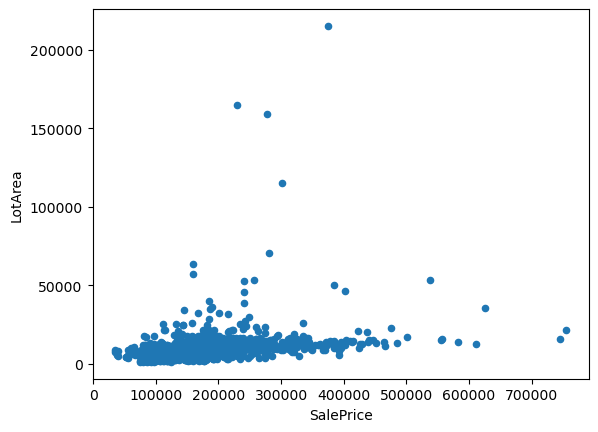

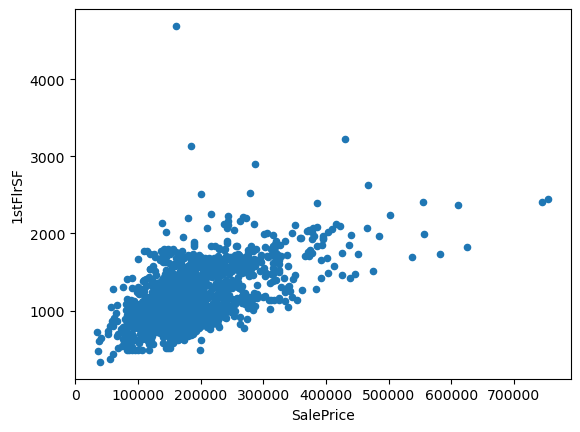

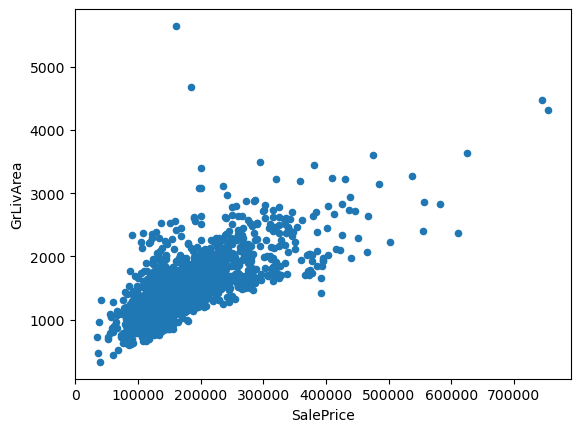

In [37]:
# Your code here - import relevant library, create scatter plots
ames.plot.scatter(y = 'LotArea', x= 'SalePrice')
ames.plot.scatter(y = '1stFlrSF', x= 'SalePrice')
ames.plot.scatter(y = 'GrLivArea', x= 'SalePrice')


In [38]:
# Your written answer here - do these seem like good candidates for linear regression?
print(' 1stFlrSF and GrLivArea seem to be good canidates for a linear regression as it shows some sort of postive correlation.')

 1stFlrSF and GrLivArea seem to be good canidates for a linear regression as it shows some sort of postive correlation.


## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [39]:
# Your code here - define y and baseline X
y = ames['SalePrice']
x_baseline = ames['GrLivArea']

In [68]:
# Your code here - import StatsModels, fit baseline model, display results
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          4.52e-223
Time:                        17:44:49   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [41]:
# Your written answer here - interpret model resut
print('as p value is below 0.05 the model is statistically significant.')

as p value is below 0.05 the model is statistically significant.


## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [69]:
X = ames_subset.drop("SalePrice", axis=1)

In [70]:
subset_model = sm.OLS(y, sm.add_constant(X))
subset_results = subset_model.fit()

print(subset_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.57e-262
Time:                        17:45:08   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

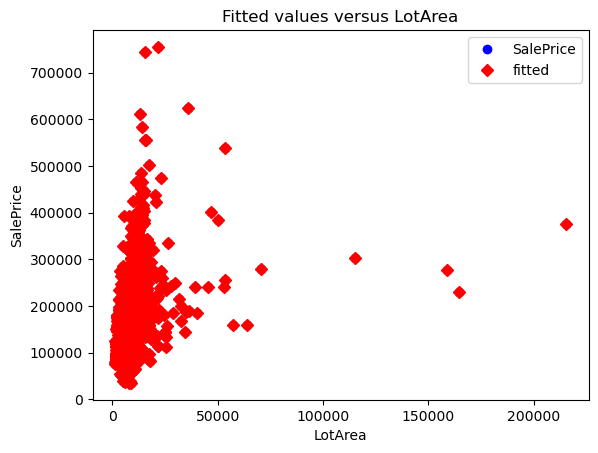

In [71]:
# Your code here - fit model and display results
sm.graphics.plot_fit(allx_results, 'LotArea')
plt.show()

In [ ]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?

print('The model is statically significant overall it explains about 57% of the varience in SalePrice. With alpha of 0.05 1stFlrSF and GrLivArea are statistcally significant, but not LotArea.

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

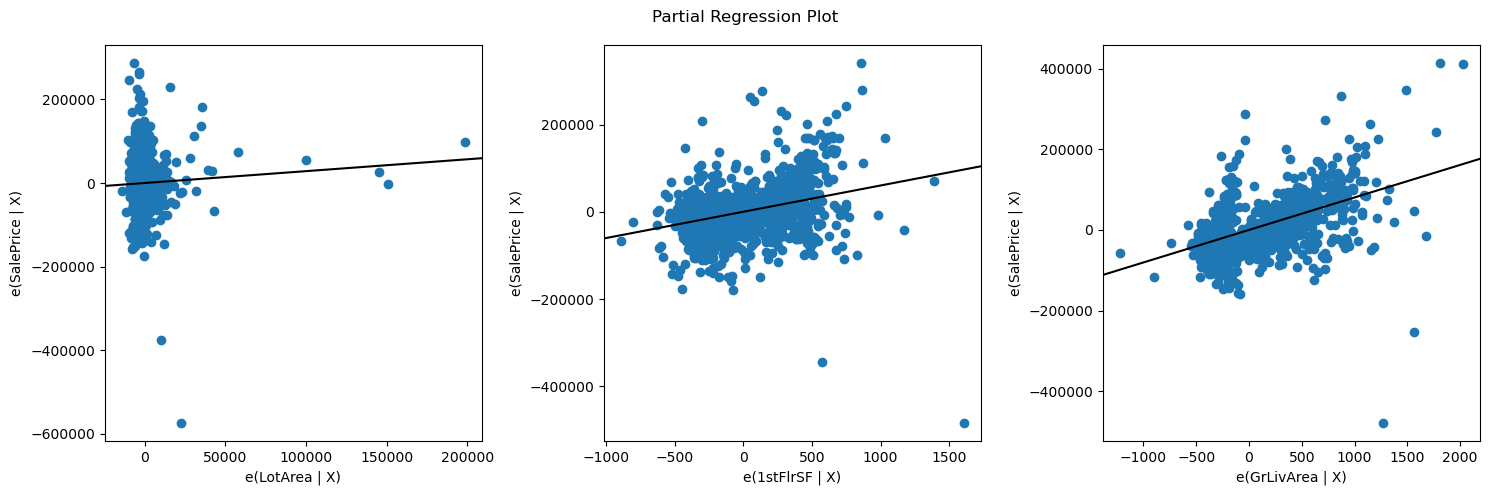

In [73]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    subset_results,
    exog_idx=list(X.columns),
    grid=(1,3),
    fig=fig)
plt.tight_layout()
plt.show()

In [74]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?
print('In the multiple regression model, LotArea is a weaker predictor than expected, as shown by the partial regression plot, which only displays the variance in SalePrice not explained by other variables. 1stFlrSF and GrLivArea still resemble their standalone scatter plots, though with less steep slopes. Despite being related to square footage, these variables seem to explain different parts of the variance. Outliers in LotArea may be affecting the fit more than anticipated, shifting the best-fit line from where you might expect.')

In the multiple regression model, LotArea is a weaker predictor than expected, as shown by the partial regression plot, which only displays the variance in SalePrice not explained by other variables. 1stFlrSF and GrLivArea still resemble their standalone scatter plots, though with less steep slopes. Despite being related to square footage, these variables seem to explain different parts of the variance. Outliers in LotArea may be affecting the fit more than anticipated, shifting the best-fit line from where you might expect.


## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [77]:
# Your code here - compare R-Squared
subset_results.rsquared

0.5649801771384371

In [78]:
# Your code here - compare intercept and coefficients
subset_results.params.values

array([-1.43134089e+04,  2.84133589e-01,  6.02866463e+01,  8.06060583e+01])

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.